<a href="https://colab.research.google.com/github/313kris/-Image-Classification-using-Convolutional-Neural-Networks-CNNs-Machine-Learning-Major-Project-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Dataset Collection for Image Classification


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display the shape of the dataset
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [4]:
# Class names corresponding to label indices
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print("First 10 labels in the training set:")
print([class_names[label[0]] for label in y_train[:10]])

First 10 labels in the training set:
['Frog', 'Truck', 'Truck', 'Deer', 'Automobile', 'Automobile', 'Bird', 'Horse', 'Ship', 'Cat']


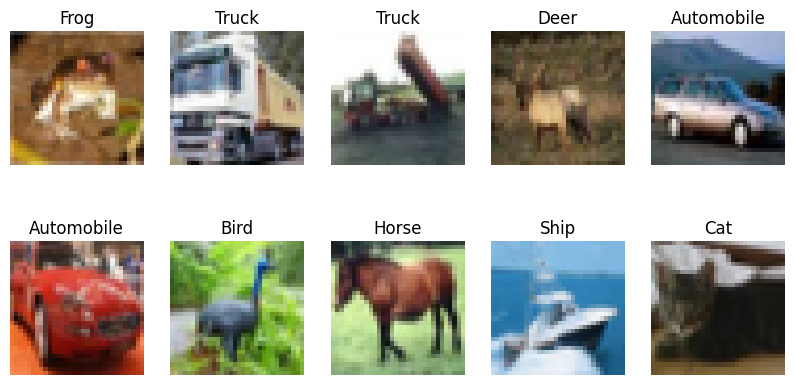

In [5]:
# Function to plot sample images
def plot_sample_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

plot_sample_images(x_train, y_train)

In [6]:
# Check the data type and value range
print(f'Type of training images: {type(x_train)}')
print(f'Data type of images: {x_train.dtype}')
print(f'Minimum and maximum pixel values: {x_train.min()}, {x_train.max()}')

Type of training images: <class 'numpy.ndarray'>
Data type of images: uint8
Minimum and maximum pixel values: 0, 255


In [7]:
# Count the number of samples per class
unique, counts = np.unique(y_train, return_counts=True)
print("Class Distribution in Training Data:")
for cls, count in zip(class_names, counts):
    print(f'{cls}: {count}')

Class Distribution in Training Data:
Airplane: 5000
Automobile: 5000
Bird: 5000
Cat: 5000
Deer: 5000
Dog: 5000
Frog: 5000
Horse: 5000
Ship: 5000
Truck: 5000


Step 2 :Data Preprocessing for Image Classification


In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [9]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}')


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


In [10]:
# Convert pixel values from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verify the transformation
print(f'After normalization - Min: {x_train.min()}, Max: {x_train.max()}')


After normalization - Min: 0.0, Max: 1.0


In [11]:
# One-Hot Encoding of labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f'One-hot encoded label example: {y_train[0]}')


One-hot encoded label example: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
from sklearn.model_selection import train_test_split

# Split the training data: 80% train, 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'New training shape: {x_train.shape}, Validation shape: {x_val.shape}')


New training shape: (40000, 32, 32, 3), Validation shape: (10000, 32, 32, 3)


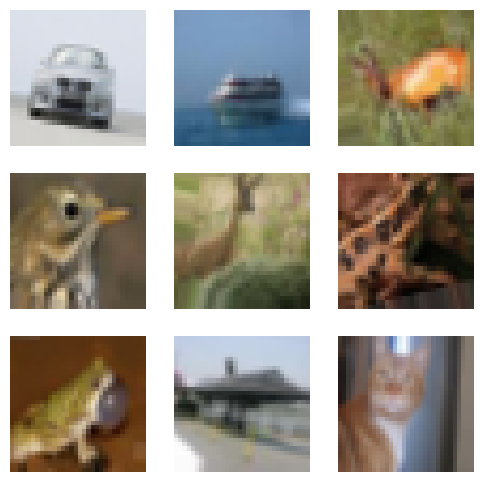

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate the image by up to 15 degrees
    width_shift_range=0.1,   # Shift image horizontally by up to 10%
    height_shift_range=0.1,  # Shift image vertically by up to 10%
    horizontal_flip=True     # Flip the image horizontally
)

# Fit the generator to training data
datagen.fit(x_train)

# Display some augmented images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()
    break  # Show only one batch of augmented images


In [14]:
print(f'Training set shape: {x_train.shape}, {y_train.shape}')
print(f'Validation set shape: {x_val.shape}, {y_val.shape}')
print(f'Testing set shape: {x_test.shape}, {y_test.shape}')


Training set shape: (40000, 32, 32, 3), (40000, 10)
Validation set shape: (10000, 32, 32, 3), (10000, 10)
Testing set shape: (10000, 32, 32, 3), (10000, 10)


Step 3 :CNN Model Architecture for Image Classification

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [16]:
def create_cnn_model():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Flattening the feature maps
    model.add(Flatten())

    # Fully Connected Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    return model

# Create the CNN model
cnn_model = create_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


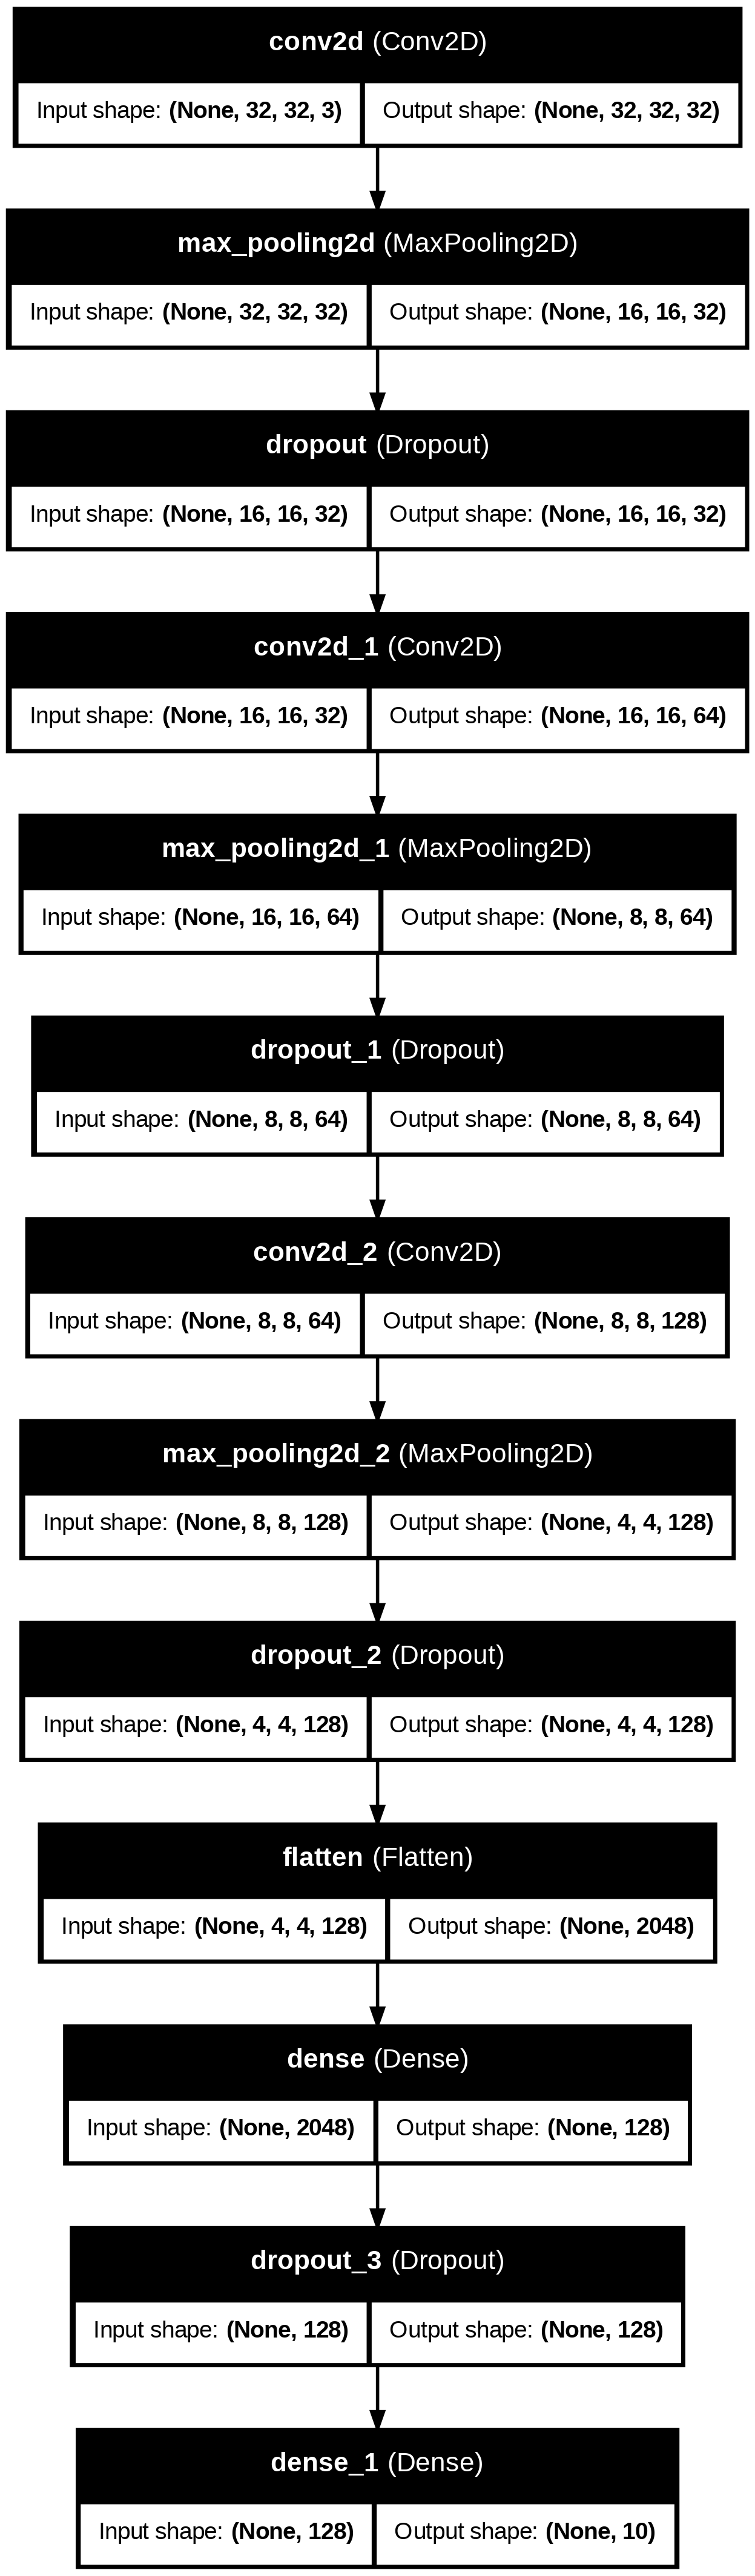

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, show_shapes=True, show_layer_names=True, to_file='cnn_model.png')


Step 4 : Model Training

In [19]:
batch_size = 64
epochs = 20


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping with stricter patience
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with optimized settings
history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Smaller batch size for quicker updates
    validation_data=(x_val, y_val),
    epochs=5,  # Reduced epochs to minimize training time
    steps_per_epoch=50,  # Fewer steps per epoch
    verbose=1,
    callbacks=[early_stopping]  # Early stopping to cut off unnecessary epochs
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 270ms/step - accuracy: 0.0995 - loss: 2.3527 - val_accuracy: 0.1056 - val_loss: 2.2888
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.1247 - loss: 2.2816 - val_accuracy: 0.1929 - val_loss: 2.2211
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.1818 - loss: 2.1686 - val_accuracy: 0.2240 - val_loss: 2.1028
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - accuracy: 0.2166 - loss: 2.0998 - val_accuracy: 0.2564 - val_loss: 2.0121
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.2334 - loss: 2.0634 - val_accuracy: 0.2709 - val_loss: 1.9785


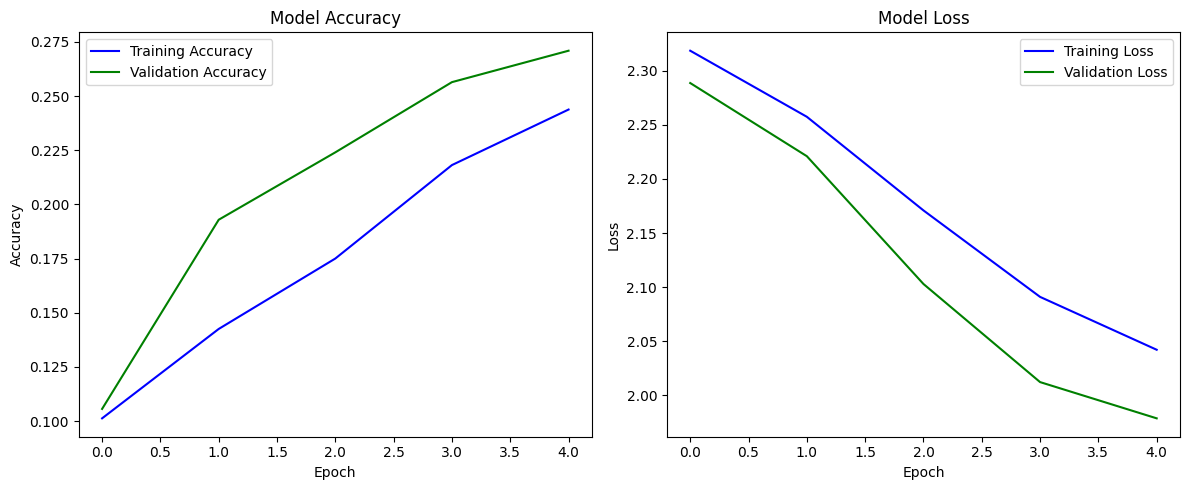

In [21]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
cnn_model.save('cnn_image_classifier.h5')
print("Model saved successfully.")


Model saved successfully.


Step 5 : Model Evaluation

In [23]:
from tensorflow.keras.models import load_model

# Load the trained model
cnn_model = load_model('cnn_image_classifier.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [24]:
# Evaluate on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.2771 - loss: 1.9790
Test Accuracy: 28.21%
Test Loss: 1.9756


In [25]:
# Predict the labels for the test set
y_pred = cnn_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.73      0.37      1000
           1       0.38      0.28      0.32      1000
           2       0.25      0.11      0.15      1000
           3       0.28      0.19      0.23      1000
           4       0.53      0.01      0.02      1000
           5       0.26      0.15      0.19      1000
           6       0.26      0.53      0.35      1000
           7       0.34      0.32      0.33      1000
           8       0.38      0.04      0.08      1000
           9       0.31      0.46      0.37      1000

    accuracy                           0.28     10000
   macro avg       0.32      0.28      0.24     10000
weighted avg       0.32      0.28      0.24     10000



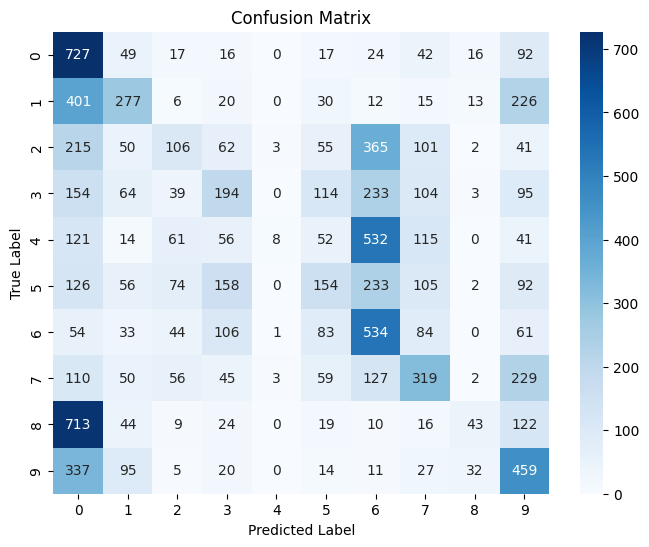

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


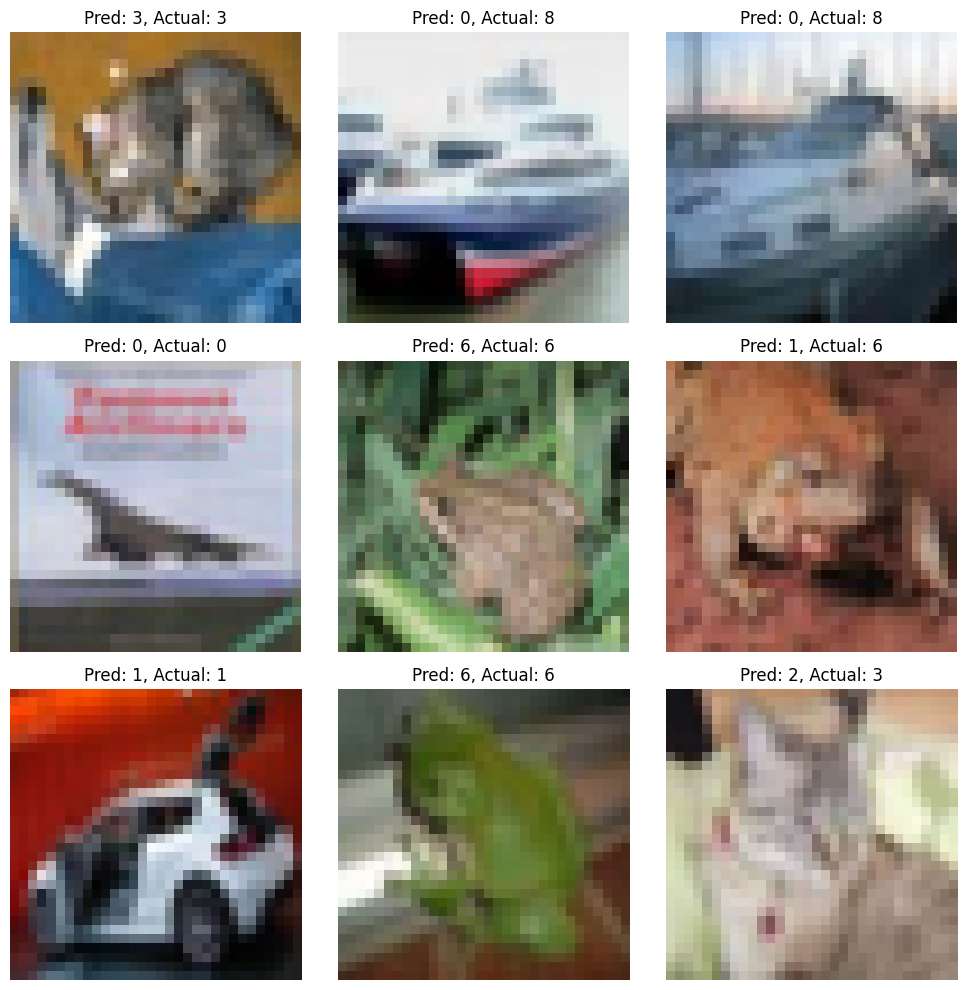

In [28]:
import numpy as np
import numpy as np

# Plotting a few test images with predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {y_pred_classes[i]}, Actual: {y_true[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Step 6: Model Optimization

In [29]:
from tensorflow.keras.applications import VGG16  # Or any other pre-trained model you want

# Load the pre-trained base model (e.g., VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the base model (except the last few)
for layer in base_model.layers[:-4]:  # Freeze all but the last 4 layers
    layer.trainable = False

# ... (Rest of your code) ...

# Fine-tune the last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# ... (Rest of your code) ...

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Mixed precision for faster training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-6)

# Data augmentation (simplified to reduce processing time)
datagen = ImageDataGenerator(
    rotation_range=10,           # Reduced rotation for speed
    zoom_range=0.1,              # Minimal zoom for faster processing
    horizontal_flip=True,        # Simple horizontal flip
    fill_mode='nearest'
)

# Fine-tune the last few layers of the base model (for better learning)
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a reduced learning rate
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model with faster settings
history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Increased batch size for speed
    validation_data=(x_val, y_val),
    epochs=5,                 # Fewer epochs for quicker training
    steps_per_epoch=20,       # Reduced steps per epoch for faster completion
    callbacks=[early_stopping, lr_reduction],  # Early stopping for efficiency
    verbose=1
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 576ms/step - accuracy: 0.2428 - loss: 1.9914 - val_accuracy: 0.3064 - val_loss: 1.9077 - learning_rate: 3.0000e-04
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 732ms/step - accuracy: 0.2815 - loss: 1.9441 - val_accuracy: 0.3242 - val_loss: 1.8789 - learning_rate: 3.0000e-04
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 548ms/step - accuracy: 0.2833 - loss: 1.9552 - val_accuracy: 0.3399 - val_loss: 1.8479 - learning_rate: 3.0000e-04
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 701ms/step - accuracy: 0.3139 - loss: 1.8914 - val_accuracy: 0.3467 - val_loss: 1.8286 - learning_rate: 3.0000e-04
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 547ms/step - accuracy: 0.3156 - loss: 1.9089 - val_accuracy: 0.3541 - val_loss: 1.8195 - learning_rate: 3.0000e-04


Step 7: Deployment and Interface

In [48]:
# Install Node.js
!apt-get install -y nodejs npm

# Install Localtunnel globally
!npm install -g localtunnel


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
nodejs is already the newest version (12.22.9~dfsg-1ubuntu3.6).
The following additional packages will be installed:
  gyp libjs-events libjs-inherits libjs-is-typedarray libjs-psl libjs-source-map libjs-sprintf-js
  libjs-typedarray-to-buffer libnode-dev libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev
  node-agent-base node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy
  node-are-we-there-yet node-argparse node-arrify node-asap node-asynckit node-balanced-match
  node-brace-expansion node-builtins node-cacache node-chalk node-chownr node-clean-yaml-object
  node-cli-table node-clone node-color-convert node-color-name node-colors node-columnify
  node-combined-stream node-commander node-console-control-strings node-copy-concurrently
  node-core-util-is node-coveralls node-cssom node-cssstyle node-debug node-decompress-response
  node-defaults node-delayed-stre

In [62]:
from flask import Flask
import subprocess

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, this is your Flask app running on Colab!"

if __name__ == '__main__':
    # Run the Flask app in the background
    subprocess.Popen(["flask", "run", "--host=0.0.0.0", "--port=5000"])
    # Start Localtunnel with the custom subdomain and authentication
    subprocess.Popen(["lt", "--port", "5000", "--subdomain", "blackloverapp", "--auth", "Titli06:Rayan331@"])


In [64]:
!npm install -g localtunnel



changed 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 high severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [66]:
!lt --port 5000 --subdomain blackloverapp --basic-auth 'Titli06:Rayan331@'


your url is: https://blackloverapp.loca.lt
^C
